In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
ls 

drive/  sample_data/


In [ ]:
import os
os.chdir("drive/MyDrive/Competition/COGAI")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score

In [ ]:
raw_train = pd.read_csv('data/Building_Strength_Train.csv', delimiter=',')
raw_test = pd.read_csv('data/Building_Strength_Test.csv', delimiter=',')

In [ ]:
raw_train.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,284.655270,73.317973,51.687838,178.920811,6.155135,980.638514,781.890541,48.581081,36.963635
std,100.857751,87.155086,62.401024,22.721371,6.291590,70.901898,82.042658,67.264973,17.686493
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,3.000000,2.330000
25%,203.500000,0.000000,0.000000,160.675000,0.000000,936.200000,746.600000,7.000000,23.610000
50%,254.000000,24.000000,0.000000,181.100000,5.800000,969.500000,781.200000,28.000000,36.055000
75%,362.600000,133.000000,118.300000,192.000000,10.400000,1040.600000,845.000000,56.000000,49.200000
max,540.000000,359.400000,174.700000,228.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
raw_test.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,0.0
mean,272.268966,75.370345,60.568966,188.320345,6.331034,953.220690,752.375517,38.213793,NaN
std,112.981328,84.133608,67.592635,15.485469,5.081550,90.162607,71.049889,50.605494,NaN
min,132.000000,0.000000,0.000000,127.000000,0.000000,801.000000,612.000000,1.000000,NaN
25%,154.850000,0.000000,0.000000,178.500000,0.000000,878.050000,697.775000,28.000000,NaN
50%,287.650000,0.000000,0.000000,189.000000,7.000000,950.200000,763.500000,28.000000,NaN
75%,330.875000,145.000000,113.150000,196.000000,10.000000,1002.000000,805.825000,28.000000,NaN
max,540.000000,260.000000,200.100000,247.000000,22.100000,1125.000000,896.000000,360.000000,NaN


In [ ]:
df = raw_train.copy()

In [ ]:
df.shape

(740, 9)

In [ ]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [ ]:
# df.head()

In [ ]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [ ]:
duplicate_rows= df[df.duplicated(keep='first')]
duplicate_rows.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.4
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.4
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.3
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.3
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.3


In [ ]:
duplicate_rows.shape

(24, 9)

In [ ]:
#Dropping duplicate rows
df.drop_duplicates(keep='first', inplace=True)
df.shape

(716, 9)

In [ ]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

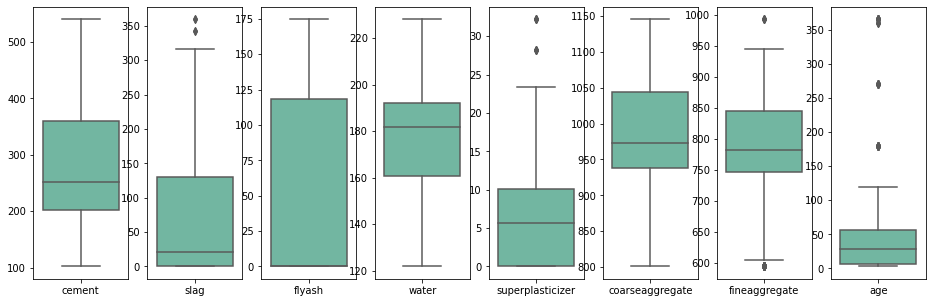

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=8, figsize=(16, 5))

sns.boxplot(data=df[['cement']], palette='Set2',ax=axes[0])
sns.boxplot(data=df[['slag']], palette='Set2',ax=axes[1])
sns.boxplot(data=df[['flyash']], palette='Set2',ax=axes[2])
sns.boxplot(data=df[['water']], palette='Set2',ax=axes[3])  
sns.boxplot(data=df[['superplasticizer']], palette='Set2',ax=axes[4])
sns.boxplot(data=df[['coarseaggregate']], palette='Set2',ax=axes[5])
sns.boxplot(data=df[['fineaggregate']], palette='Set2',ax=axes[6])
sns.boxplot(data=df[['age']], palette='Set2',ax=axes[7])
  

In [ ]:
# sns.heatmap(df.corr(), annot=True)

In [ ]:
unscaled_df = df.copy()

In [ ]:
df=unscaled_df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

robust_scaler = RobustScaler()
df= df.loc[:,['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']]
df = pd.DataFrame(robust_scaler.fit_transform(df),
                   columns=['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
                   index = df.index)

In [ ]:
df['csMPa']=unscaled_df['csMPa']
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1.835669,-0.160889,0.0,-0.629393,-0.316832,0.630682,-1.069106,0.000000,79.99
1,1.835669,-0.160889,0.0,-0.629393,-0.316832,0.772727,-1.069106,0.000000,61.89
2,0.514013,0.930856,0.0,1.479233,-0.564356,-0.392045,-1.902439,4.938776,40.27
3,0.514013,0.930856,0.0,1.479233,-0.564356,-0.392045,-1.902439,6.877551,41.05
4,-0.338854,0.853476,0.0,0.329073,-0.564356,0.047348,0.450203,6.775510,44.30


In [ ]:
x_train = df.drop(['csMPa'],axis=1)
y_train = df['csMPa']

In [ ]:
x_train.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')

# Not working (don't run)FE- Backward elimination

Not working (don't run)FE- Backward elimination

In [ ]:
import statsmodels.api as sm
def backwardElimination(x,y ,sl):
    numVars = len(x.columns)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(endog = y, exog = x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = x_train
X_Modeled = backwardElimination(X_opt, y_train ,SL)

ValueError: ignored

In [ ]:
maxVar = max(regressor_OLS.pvalues)
maxVar

0.3479261401446375

#Working FE- Backward Selection

Working FE- Backward Selection run this

In [ ]:
import statsmodels.api as sm


regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

In [ ]:
x_train.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')

In [ ]:
x_train = x_train.drop(['superplasticizer'],axis=1) # Dropping this feature because p values is gretaer than 0.05

In [ ]:
#@title Check again if any variable has p value greater than 0.05
#Check again
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1066.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:37:49   Log-Likelihood:                         -2783.1
No. Observations:                 716   AIC:                                      5580.
Df Residuals:                     709   BIC:                                      5612.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cement             36.3372      0.838     43.375      0.000      34.692      37.982
slag               29.2481      0.647     45.177      0.000      27.977      30.519
flyash             29.7212      0.727     40.905      0.000      28.295      31.148
water               4.6798      0.869      5.388      0.000       2.975       6.385
coarseaggregate    13.4389      0.839     16.008      0.000      11.791      15.087
fineaggregate      13.7704      0.758     18.160      0.000      12.282      15.259
age                 7.0799      0.336     21.065      0.000       6.420       7.740
==============================================================================
Omnibus:                       10.263   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.234
Skew:                          -0.224   Prob(JB):                      0.00364
Kurtosis:                       3.420   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Final- coz no other p value is greater 
x_train.shape

Progress

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_valid)

In [ ]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y_valid, y_pred)
print(MSE)

45.20229637345679


In [ ]:
  
R2 = metrics.r2_score(y_valid, y_pred)
print(R2)

0.8682506286514653


KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pred = knn_reg.predict(x_valid)

In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("Re score: {}".format(R2))

MSE:77.03940233333334
Re score: 0.7754562568541625


rf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_valid)   

In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("Re score: {}".format(R2))

MSE:24.570397177150237
Re score: 0.9283856210505661


xgboost


In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train,y_train)
y_pred = xgb_reg.predict(x_valid)  

[10:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("Re score: {}".format(R2))

MSE:22.592941574279365
Re score: 0.9341492338191613
